In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Materials
# matlib.py

materials=[]

materials.append( {"name": "E-glass/Epoxy", "units": "MPa-mm-Mg", "type": "UD", "fiber": "E-glass",
     "Vf": 0.55, "rho": 2000E-12,
     "description": "Typical UD E-glass/Epoxy from TMM4175",  
     "E1": 40000, "E2": 10000, "E3": 10000, 
     "v12": 0.3, "v13": 0.3, "v23": 0.4, 
     "G12": 3800, "G13": 3800, "G23": 3400, 
     "a1": 7e-06, "a2": 2.2e-05, "a3": 2.2e-05, 
     "XT": 1000, "YT": 40, "ZT": 40,
     "XC": 700, "YC": 120, "ZC": 120,
     "S12": 70, "S13": 70, "S23": 40,
     "f12":-0.5, "f13":-0.5, "f23":-0.5} )

materials.append( {"name": "S-glass/Epoxy", "units": "MPa-mm-Mg", "type": "UD", "fiber": "S-glass",
     "Vf": 0.55, "rho": 2000E-12,
     "description": "Typical UD S-glass/Epoxy from TMM4175",  
     "E1": 48000, "E2": 11000, "E3": 11000, 
     "v12": 0.3, "v13": 0.3, "v23": 0.4, 
     "G12": 4200, "G13": 4200, "G23": 3600, 
     "a1": 4e-06, "a2": 2.0e-05, "a3": 2.0e-05, 
     "XT": 1300, "YT": 40, "ZT": 40,
     "XC": 800, "YC": 140, "ZC": 140,
     "S12": 70, "S13": 70, "S23": 40,
     "f12":-0.5, "f13":-0.5, "f23":-0.5} )

materials.append( {"name": "Kevlar-49/Epoxy", "units": "MPa-mm-Mg", "type": "UD", "fiber": "Kevlar-49",
     "Vf": 0.55, "rho": 1400E-12,
     "description": "Typical UD Kevlar-49/Epoxy from TMM4175",  
     "E1": 73000, "E2": 5000, "E3": 5000, 
     "v12": 0.35, "v13": 0.35, "v23": 0.45, 
     "G12": 2200, "G13": 2200, "G23": 1700, 
     "a1": -1e-06, "a2": 5.0e-05, "a3": 5.0e-05, 
     "XT": 1400, "YT": 20, "ZT": 20,
     "XC": 300, "YC": 120, "ZC": 120,
     "S12": 40, "S13": 40, "S23": 20,
     "f12":-0.5, "f13":-0.5, "f23":-0.5} )

materials.append( {"name": "Carbon/Epoxy(a)", "units": "MPa-mm-Mg", "type": "UD", "fiber": "Carbon",
     "Vf": 0.55, "rho": 1600E-12,
     "description": "Typical low modulus carbon/Epoxy from TMM4175",  
     "E1": 130000, "E2": 10000, "E3": 10000, 
     "v12": 0.28, "v13": 0.28, "v23": 0.5, 
     "G12": 4500, "G13": 4500, "G23": 3500, 
     "a1": -0.5e-06, "a2": 3.0e-05, "a3": 3.0e-05, 
     "XT": 1800, "YT": 40, "ZT": 40,
     "XC": 1200, "YC": 180, "ZC": 180,
     "S12": 70, "S13": 70, "S23": 40,
     "f12":-0.5, "f13":-0.5, "f23":-0.5} )

materials.append( {"name": "Carbon/Epoxy(b)", "units": "MPa-mm-Mg", "type": "UD", "fiber": "Carbon",
     "Vf": 0.55, "rho": 1700E-12,
     "description": "Typical high modulus carbon/Epoxy from TMM4175",  
     "E1": 330000, "E2": 8000, "E3": 8000, 
     "v12": 0.28, "v13": 0.28, "v23": 0.5, 
     "G12": 4000, "G13": 4000, "G23": 2700, 
     "a1": -0.7e-06, "a2": 3.0e-05, "a3": 3.0e-05, 
     "XT": 1000, "YT": 40, "ZT": 40,
     "XC": 800, "YC": 100, "ZC": 100,
     "S12": 70, "S13": 70, "S23": 40,
     "f12":-0.5, "f13":-0.5, "f23":-0.5})
materials.append({"name": "Construction steel", "Vf": 1, "rho": 7780E-12, 
                 "E1": 210000,
                  "XT": 600})

def get(matname):
    for m in materials:
        if m['name']==matname:
            return m
    return False

def printlist():
    for m in materials:
        print(m['name'])
        
def newMaterial(**kwargs):
    m={}
    for key in kwargs:
        m.update({key:kwargs[key]})
    return m

In [78]:
# Functions
def energy_calc(stress, E_mod, density):
    c = 1/2
    return c*stress**2/(E_mod*density)

Specific energy E-glass/Epoxy 7836.99 J
Specific energy S-glass/Epoxy 11037.10 J
Specific energy Kevlar-49/Epoxy 10612.38 J
Specific energy Carbon/Epoxy(a) 9062.94 J
Specific energy Carbon/Epoxy(b) 1059.55 J
Specific energy Construction steel 110.17 J


Text(0.5, 1.0, 'Specific Energy J/kg')

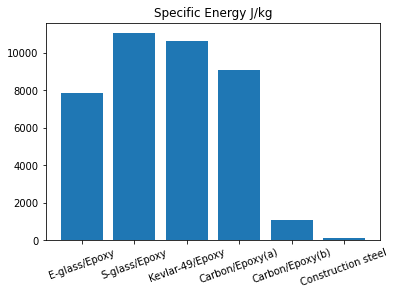

In [79]:
x = list(range(5))
energies = []
labels = []
for i, material in enumerate(materials[:]):
    max_stress = material["XT"]
    E = material["E1"]
    mat_fraction = material["Vf"]
    mat_density = material["rho"]*1e9
    label = material["name"]
    epoxy_density = 1.1
    total_density = mat_fraction*mat_density + (1-mat_fraction)*epoxy_density
    specific_energy = energy_calc(max_stress, E, total_density/1000)
    
    print("Specific energy", label, "{:.2f}".format(specific_energy), "J")
    labels.append(label)
    energies.append(specific_energy)
    
plt.bar(labels, energies)
plt.xticks(rotation=20)

# Chart formatting
#plt.yticks(labels, rotation="vertical")
plt.title("Specific Energy J/kg")